In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import math as math
from scipy.misc import comb

Question 4 : Design and implement a quadrature rule for the integrals needed to compute the Lebesgue constant for Legendre truncation. Plotting the graph of ||Sn|| against n, experimentally determine the constant C in the assumed dependence ||Sn||=Csqrt(n).

In [2]:
def Legendre (x, k):
    #computes value of Legendre polynomial of degree k at point x #print x#debug#print k#debug
    if (k==0): #Po = 0 #print 'k is 0' #debug
        P=1.
    if(k==1): #P1=x #print 'k is 1' #debug
        P=x
    else:
        a=1. #initializing
        b=x
        for i in range (1,k) : #the recursive formula #print 'going in ; i='#print i#print 'a= ; b='#print a#print b #debug
            num=(2*i+1)*x*b - i*a
            den=i+1 #print 'num= ; den= '#print num#print den
            P=num/den #P=((2*i+1)*x*b-(i)*a)/(i+1) #Pi+1 = (2(i+1) * xP;i(x) - iP;i-1(x)) / i+1 #debug
            a=b
            b=P#print P #debug
    return P

In [3]:
def abssum(x, n) :
    #intermediate step : compute |sum(a;k*P;k(x))| for k from 0 to n at a given point x
    somme=0.0 #initializing
    for k in range (n+1): #for k from 0 to n
        a=k+.5 #computes a;k
        P=Legendre(x,k) #computes P;k(x)
        somme = somme +a*P
    S=abs(somme) #takes absolute value of the sum
    return S

In [4]:
def quadrature(n):
    #computes Simpson's approx. of ||S||=integral(abs sum(a;k*P;k(x))) for x between -1 and 1 for a given degree n
    S=1/3.*(abssum(-1.0,n)+4*abssum(0.0,n)+abssum(1.0,n))#print n #printing exact values to compute C#print S 
    return S

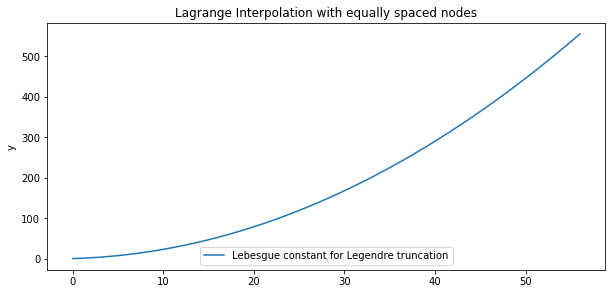

In [5]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)

nn=57 # maximum degree
nlist = [x for x in range (nn)] #initializing
Slist = [0 for x in range (nn)]#for i in range (nn):#Legendre(-1.0, i) #debug

for i in range (nn):#computing ||Sn|| for each n
    Slist[i]=quadrature(i)
ax1.plot(nlist,Slist,label='Lebesgue constant for Legendre truncation')

plt.legend()                                                             #more graph setup - no math relevance
ax1.set_title(r'Lagrange Interpolation with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="lower center")
plt.show()

 We can now solve for C ~ 